Predict automobile price using Machine Learning
Use Machine learning to predict the price of a car based on several characteristics. The objective is to build a model to understand the factors that drive the car of the price. This will help your automobile company launch their new car in the market effectively by pricing it better.
Tasks:
-	Perform EDA on the data
-	Perform data cleanup as required
-	Pick the best variable for making a simple linear regression model
-	Perform train test split
-	Build model using best variable and report the R2
-	Make a multiple regression model
-	Apply feature selection approaches discussed in the class
-	Final model should be interpretable
-	What is your understanding of the factors that drive price? 

Data description:
Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3(Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.)
2. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
3. fuel-type: diesel, gas.
4. aspiration: std, turbo.
5. num-of-doors: four, two.
6. body-style: hardtop, wagon, sedan, hatchback, convertible.
7. drive-wheels: 4wd, fwd, rwd.
8. engine-location: front, rear.
9. wheel-base: continuous from 86.6 120.9.
10. length: continuous from 141.1 to 208.1.
11. width: continuous from 60.3 to 72.3.
12. height: continuous from 47.8 to 59.8.
13. curb-weight: continuous from 1488 to 4066.
14. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
15. num-of-cylinders: eight, five, four, six, three, twelve, two.
16. engine-size: continuous from 61 to 326.
17. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
18. bore: continuous from 2.54 to 3.94.
19. stroke: continuous from 2.07 to 4.17.
20. compression-ratio: continuous from 7 to 23.
21. horsepower: continuous from 48 to 288.
22. peak-rpm: continuous from 4150 to 6600.
23. city-mpg: continuous from 13 to 49.
24. highway-mpg: continuous from 16 to 54.
25. price: continuous from 5118 to 45400.

## Data Importing & Exploring

In [1]:
%%time
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Wall time: 40.1 s


In [2]:
df = pd.read_csv("AutoData.csv")
df.head(3)

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [3]:
df.isnull().sum()
#No null values

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
df.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [5]:
for i in df.columns:
    print(i)
    print(df[i].unique())

symboling
[ 3  1  2  0 -1 -2]
make
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'


## EDA

In [6]:
df["make"].unique()
#it has both brand name & model name

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [7]:
#seperating make name & model from data
n= df["make"].str.split(" ",n = 1, expand = True)
n.head(2)

,0,1
0,alfa-romero,giulia
1,alfa-romero,stelvio


In [8]:
df["make"]=n[0].str.upper()
df["model"]=n[1]
df["make"].unique()
#df["model"].unique()


array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAXDA', 'MAZDA', 'BUICK', 'MERCURY',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE',
       'PORCSHCE', 'RENAULT', 'SAAB', 'SUBARU', 'TOYOTA', 'TOYOUTA',
       'VOKSWAGEN', 'VOLKSWAGEN', 'VW', 'VOLVO'], dtype=object)

In [9]:
df["model"].value_counts()
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,model
0,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,giulia
1,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,stelvio
2,1,ALFA-ROMERO,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Quadrifoglio
3,2,AUDI,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,100 ls
4,2,AUDI,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,100ls


In [10]:
#maker is seperated 
df1 = df.drop(["model"],axis=1)
df1.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,ALFA-ROMERO,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,AUDI,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,AUDI,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Data Cleaning

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
make                205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

Ploting Graphs

In [12]:
df1["make"].unique()
df1["make"]= df1["make"].replace(to_replace='TOYOUTA',value='TOYOTA')
df1["make"]= df1["make"].replace(to_replace='VOKSWAGEN',value='VOLKSWAGEN')
#volkswagen
df1["make"].unique()

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAXDA', 'MAZDA', 'BUICK', 'MERCURY',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE',
       'PORCSHCE', 'RENAULT', 'SAAB', 'SUBARU', 'TOYOTA', 'VOLKSWAGEN',
       'VW', 'VOLVO'], dtype=object)

In [13]:
make = df1["make"].value_counts().reset_index()
make.head()

,index,make
0,TOYOTA,32
1,NISSAN,18
2,MAZDA,15
3,MITSUBISHI,13
4,HONDA,13


In [14]:
make.head()

,index,make
0,TOYOTA,32
1,NISSAN,18
2,MAZDA,15
3,MITSUBISHI,13
4,HONDA,13


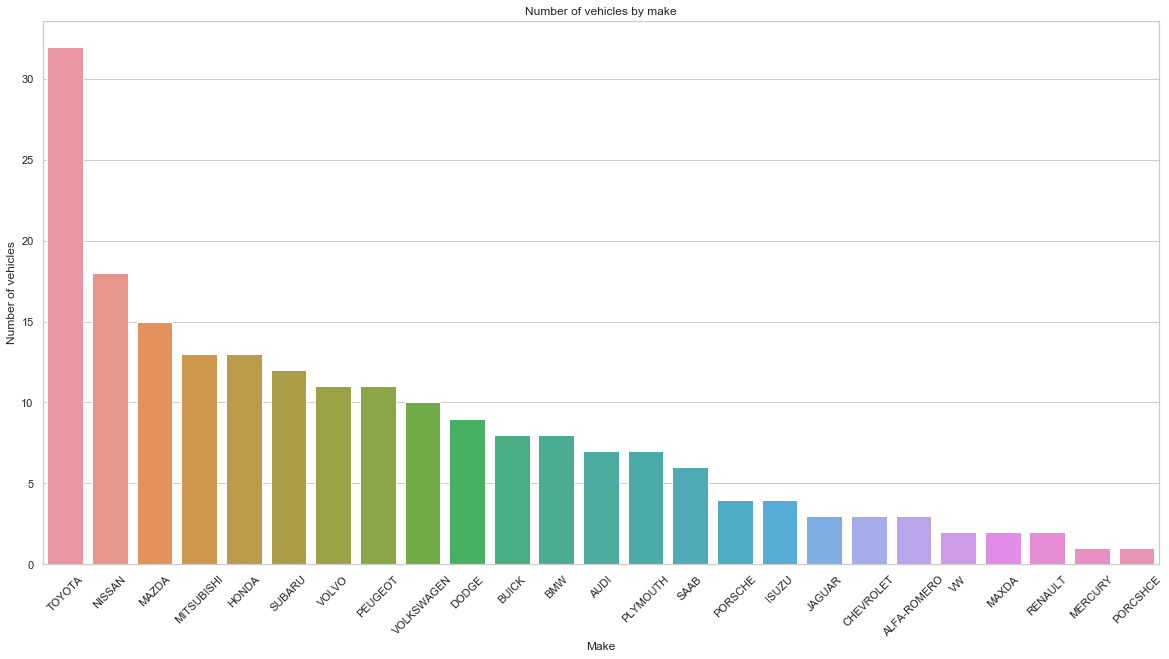

In [15]:
plt.figure(figsize=[20,10])
sns.set(style="whitegrid")
chart=sns.barplot("index","make",data = make)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

Hence, Toyota is the top car maker with many models

[(-3, 3)]

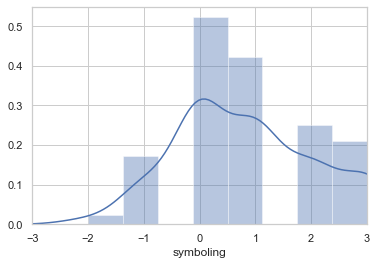

In [16]:
sns.distplot(df1["symboling"]).set(xlim=(-3,3))

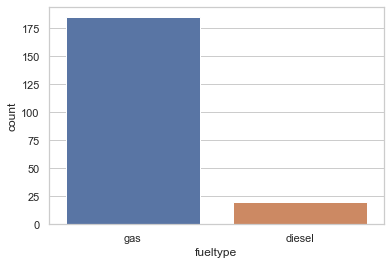

In [17]:
sns.countplot(df1["fueltype"])

In [18]:
#df1.dtypes(include=[object])
obj_col = df1.select_dtypes(object).columns
obj_col = obj_col.drop("make")

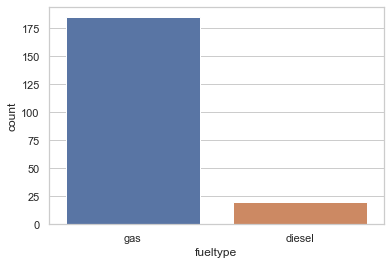

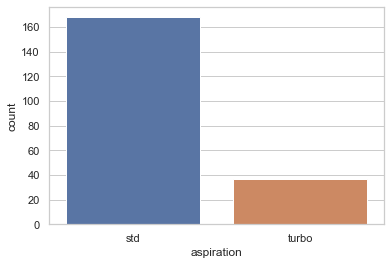

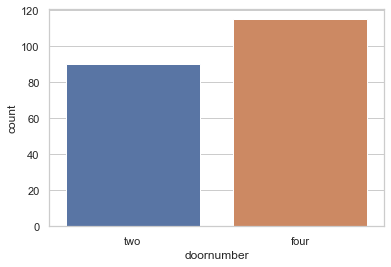

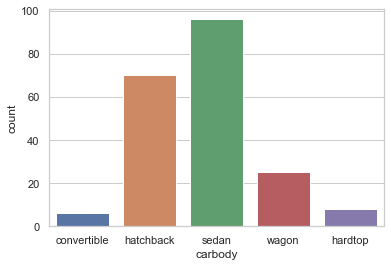

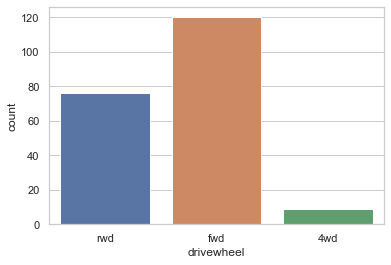

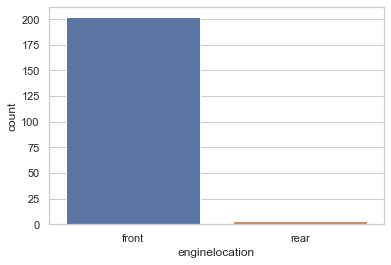

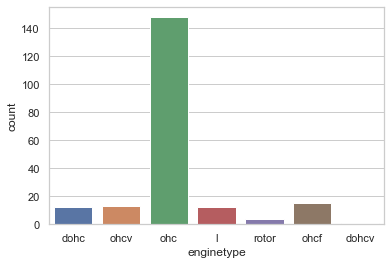

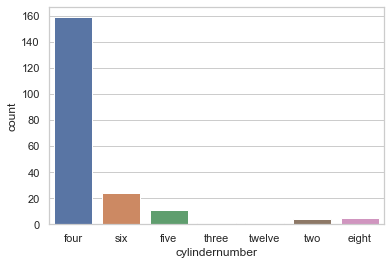

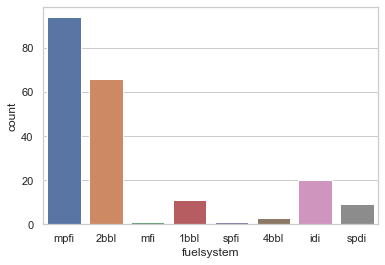

In [19]:
for i in obj_col:
    #plt.figure(figsize=[8,8])
    sns.set(style="whitegrid")
    sns.countplot(x = i,data=df1)
    plt.show()

In [20]:
int_col = df1.select_dtypes(exclude=object).columns
int_col

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

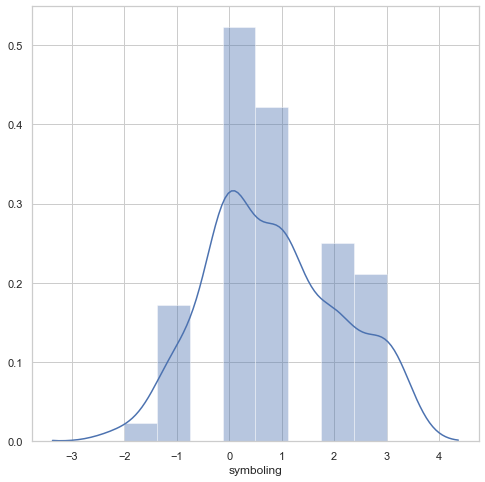

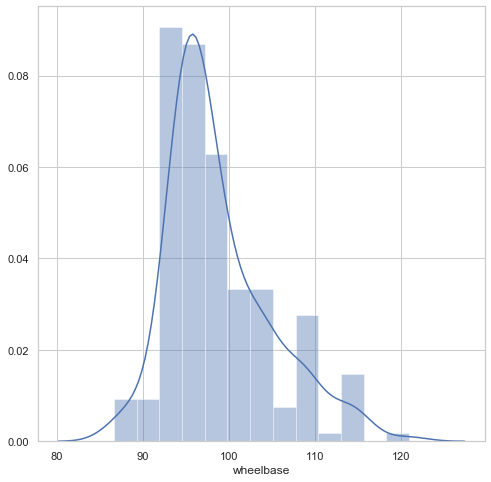

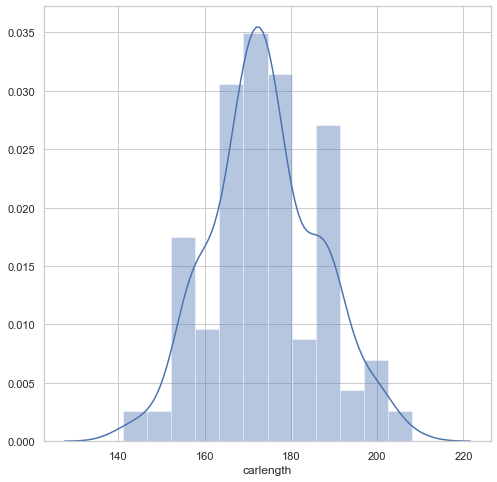

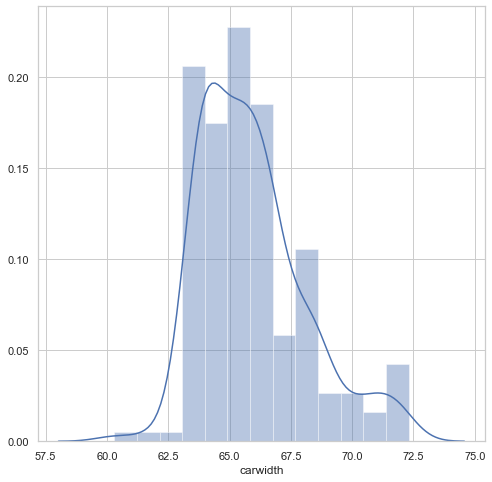

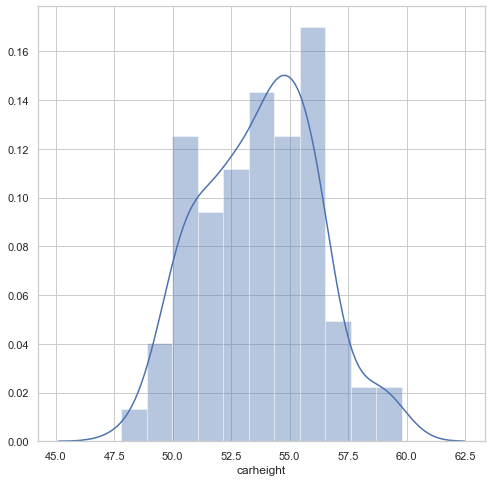

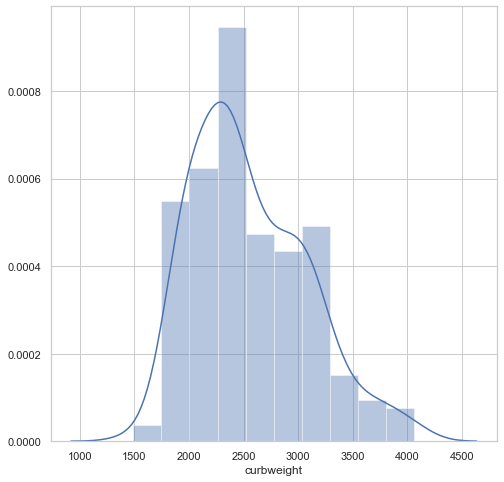

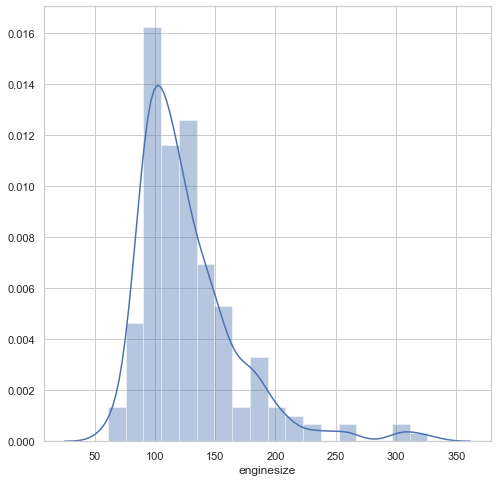

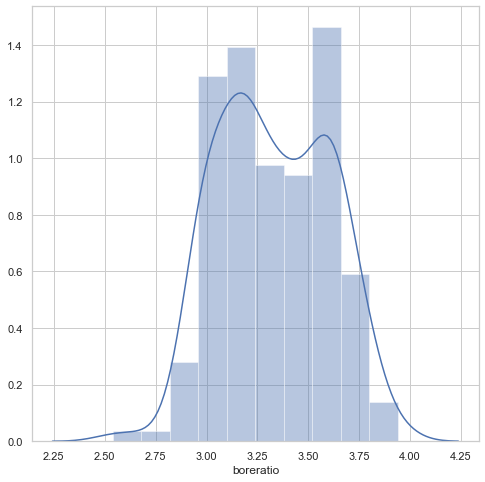

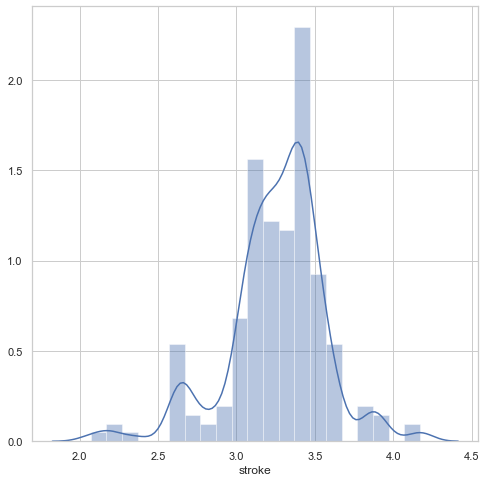

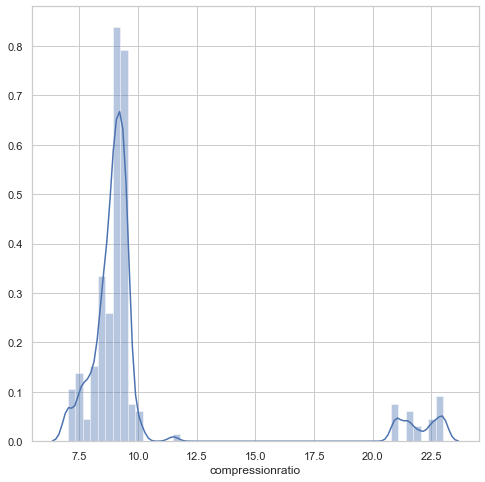

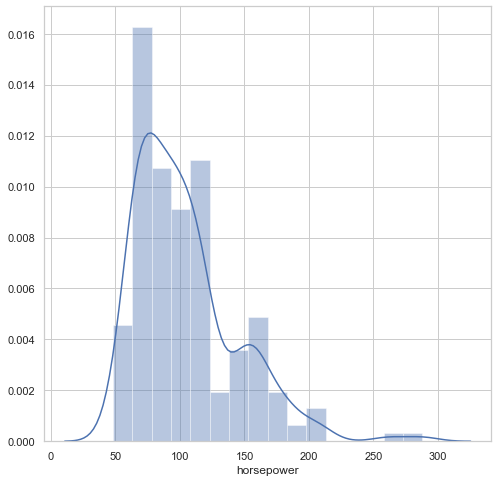

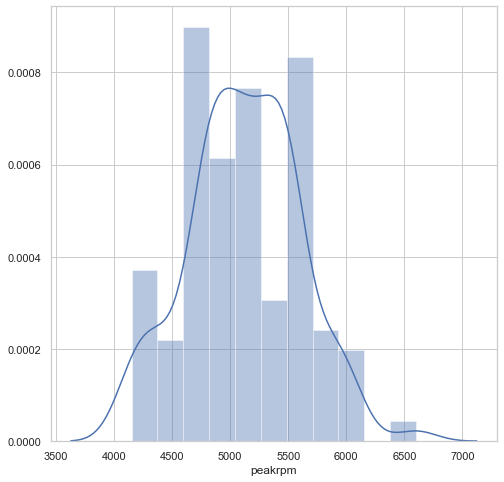

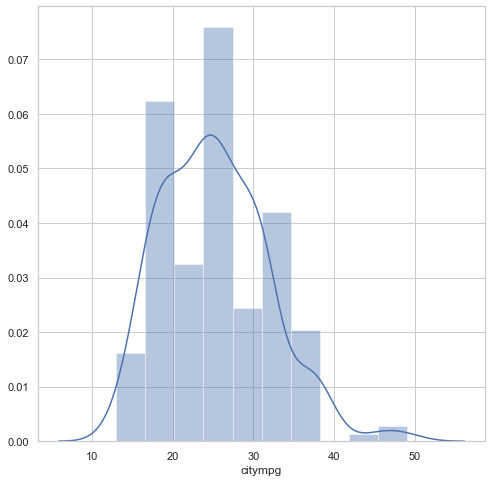

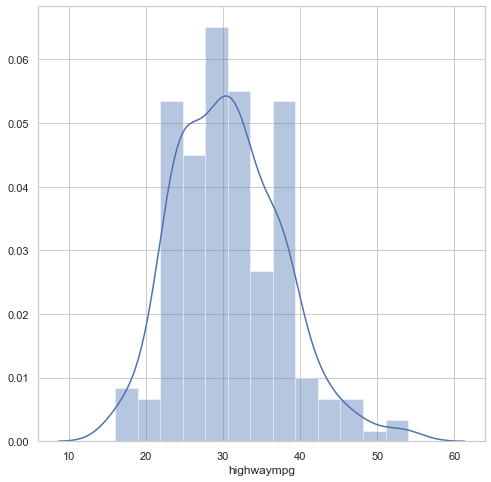

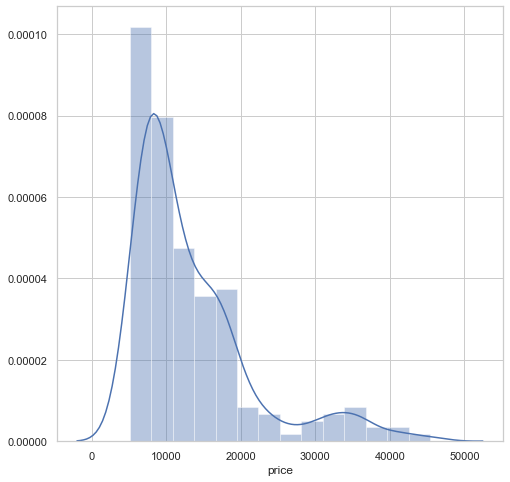

In [21]:
for i in int_col:
    plt.figure(figsize=[8,8])
    sns.set(style="whitegrid")
    sns.distplot(df1[i])
    plt.show()

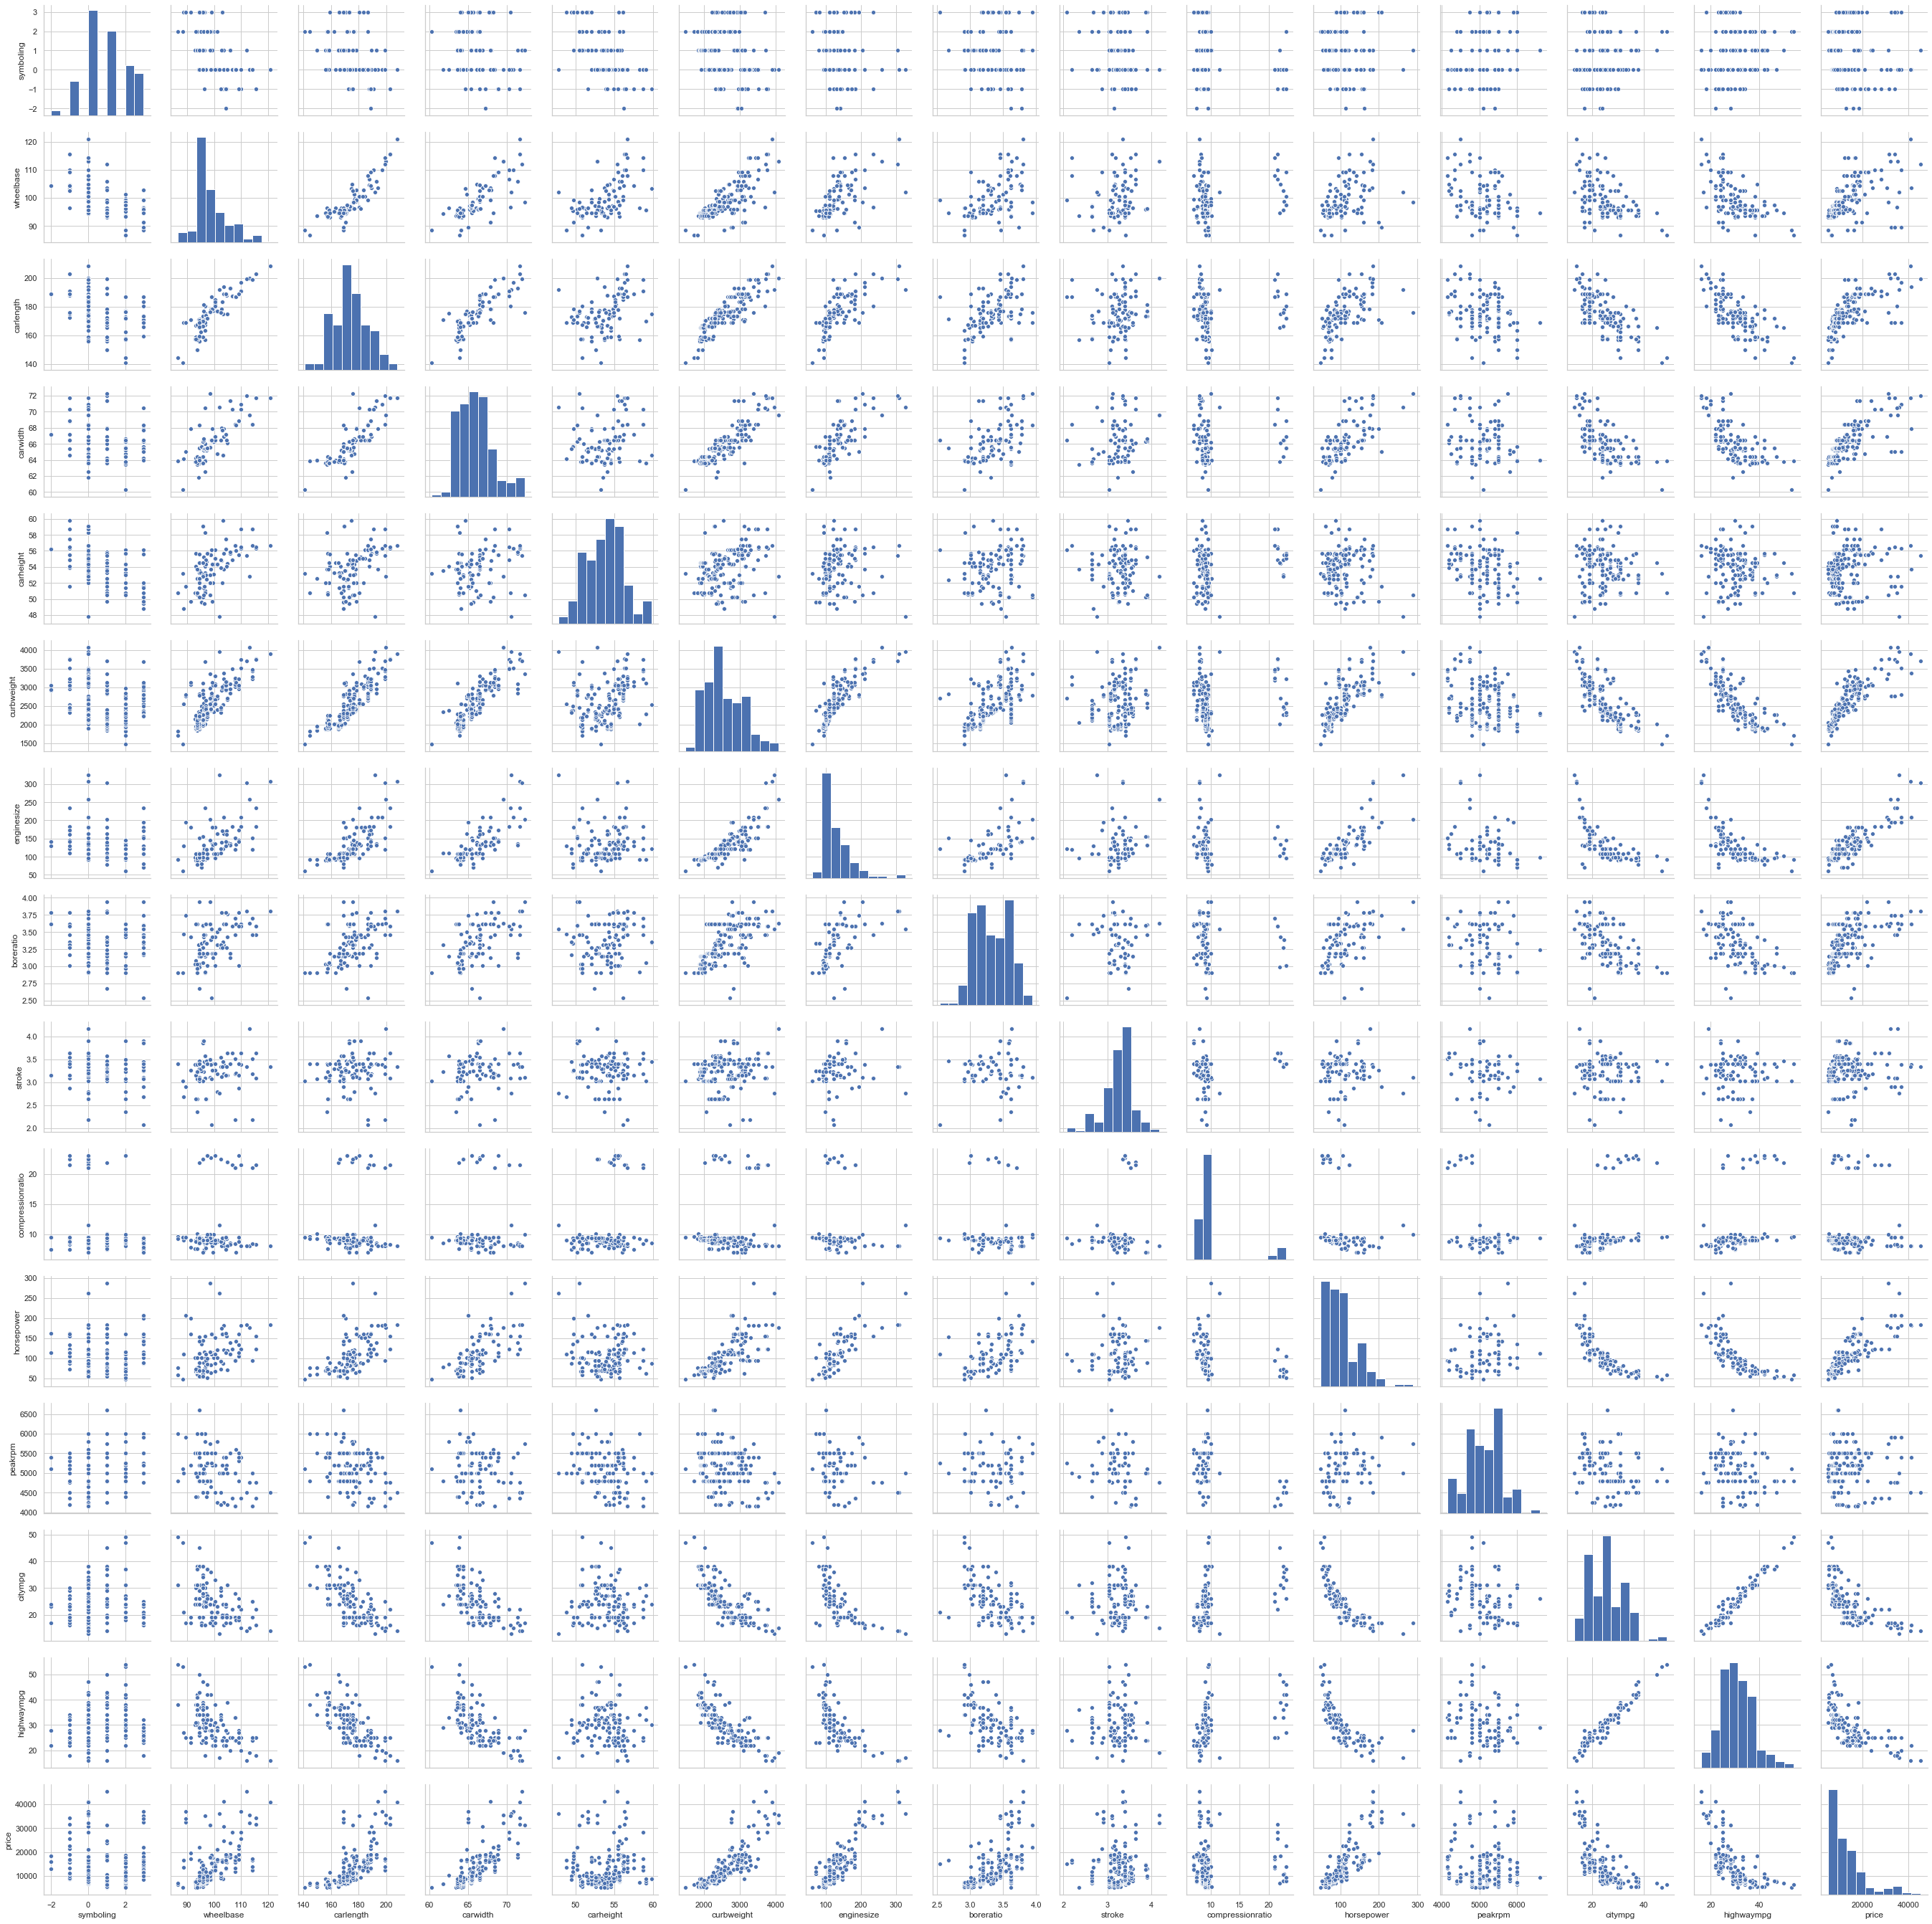

In [22]:
sns.pairplot(df1)

### Correlation map

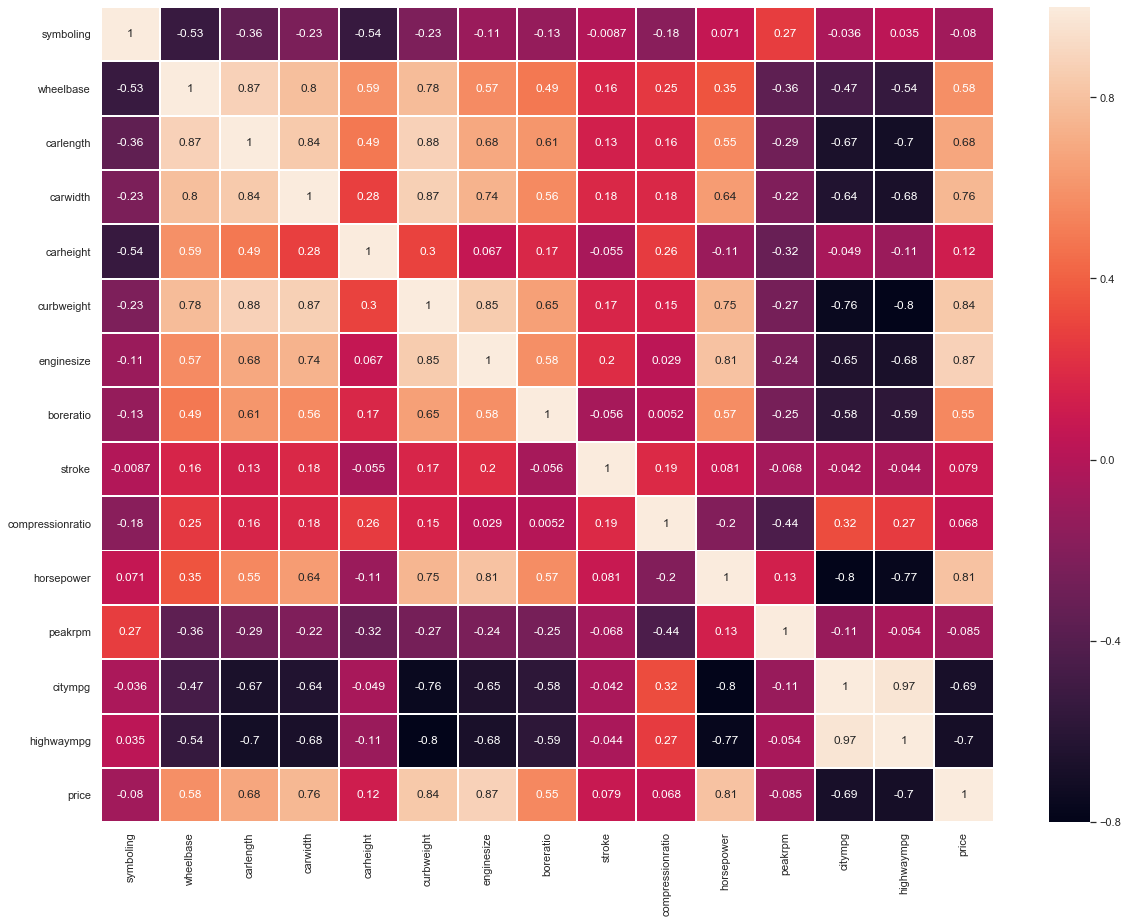

In [23]:
corr = df1.corr()
plt.figure(figsize = (20,15))
sns.heatmap(corr,annot=True,linewidths=1)
#plt.figure(figsize=[20,20])

In [24]:
corr["price"].reset_index().sort_values(["price"], ascending=False)

,index,price
14,price,1.000000
6,enginesize,0.874145
5,curbweight,0.835305
10,horsepower,0.808139
3,carwidth,0.759325
2,carlength,0.682920
1,wheelbase,0.577816
7,boreratio,0.553173
4,carheight,0.119336
8,stroke,0.079443


Price based on Maker

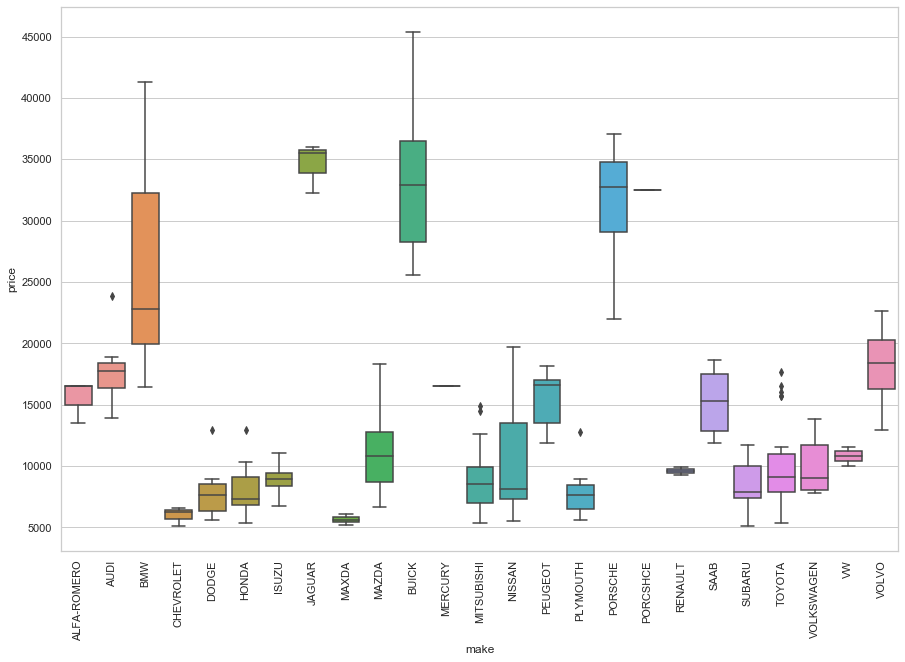

In [25]:
plt.figure(figsize=[15,10])
a=sns.boxplot(df1["make"],df1["price"])
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)

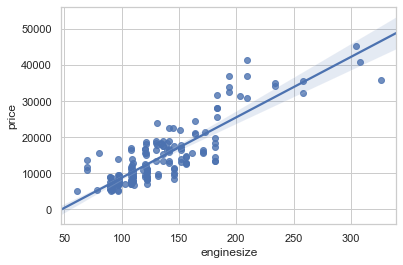

In [26]:
sns.regplot(df1["enginesize"],df1["price"])

With increase in engine size Price also increase

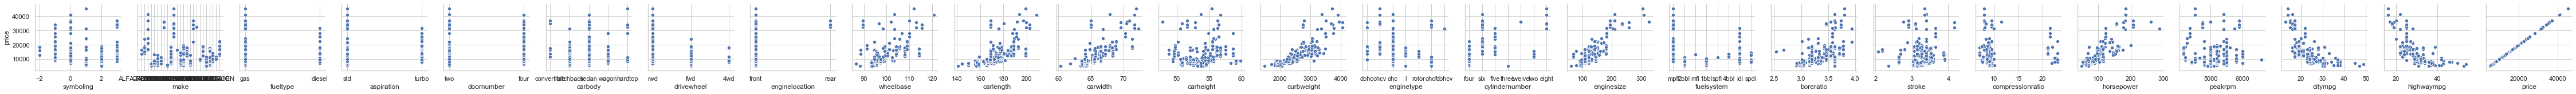

In [27]:
#plt.subplot(figsize=[5,5])
sns.pairplot(data = df1,x_vars=df1.columns,y_vars="price")

# Train test split

In [28]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [29]:
df1.head(3)

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,ALFA-ROMERO,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


### SLR Method

From corr, Engine size is corelated with price of car highly @0.87

In [48]:
# create training and testing vars
y = df1[["price"]]
X = df1[["enginesize"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40, random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#X.head()

(123, 1) (123, 1)
(82, 1) (82, 1)


In [49]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
preds = model.predict(X_test)

In [51]:
from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_test,preds))

R2 score : 0.75


In [52]:
#curbweight
y = df1[["price"]]
X = df1[["curbweight"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40, random_state=100)

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_test,preds))

R2 score : 0.58


In [53]:
#horsepower

y = df1[["price"]]
X = df1[["horsepower"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40, random_state=100)

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_test,preds))

R2 score : 0.68


### Best model based on SLR Method:

From analysis, Engine size attribute mostly predicts the price at high r2 value 

##### I prefer to choose Engine size because it has high corr & the r2 score is high when compare to others

## Creating Dummies

In [36]:
#symboling: -3, -2, -1, 0, 1, 2, 3
#(Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less),
# this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling".
# A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.)
#rep_val = {3:"Risky",2:"",1:"",0:"",}
df1["symboling"] = df1["symboling"].astype(str)
df1.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,ALFA-ROMERO,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,AUDI,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,AUDI,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [68]:
df_dum = pd.get_dummies(df1)
df_dum.head()

test_dum = pd.get_dummies(df1)
test_dum.head(3)
#test_dum.info()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0


## MLR Method

### RFE &VIF Ranking

In [38]:
y = test_dum[["price"]]
X = test_dum.drop("price",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(143, 82) (143, 1)
(62, 82) (62, 1)


In [39]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
[variance_inflation_factor(X_train.values, ind) for ind in range(3)]

[35.82595084443208, 32.682718359011666, 31.691471016286528]

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif[:12]

C:\Users\Anand\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Anand\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
10,peakrpm,8.73
3,carheight,10.10
7,stroke,13.69
2,carwidth,31.69
1,carlength,32.68
0,wheelbase,35.83
12,highwaympg,56.53
4,curbweight,57.30
11,citympg,67.92
9,horsepower,94.34


#### By taking first 10 VIF values for MLR Prediction

In [71]:
vif_col = vif[:12]
col = list(vif_col["Features"])
col

['peakrpm',
 'carheight',
 'stroke',
 'carwidth',
 'carlength',
 'wheelbase',
 'highwaympg',
 'curbweight',
 'citympg',
 'horsepower',
 'boreratio',
 'compressionratio']

In [60]:
y = test_dum[["price"]]
X = test_dum[col]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35, random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(133, 12) (133, 1)
(72, 12) (72, 1)


In [61]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_test,preds))

R2 score : 0.73


In [69]:
vif_col = vif[:8]
col = list(vif_col["Features"])

y = test_dum[["price"]]
X = test_dum[col]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35, random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_test,preds))

(133, 8) (133, 1)
(72, 8) (72, 1)
R2 score : 0.67


## MLR for all variables

In [62]:
y = test_dum[["price"]]
X = test_dum.drop("price",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35, random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(133, 82) (133, 1)
(72, 82) (72, 1)


In [63]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_test,preds))

R2 score : 0.81


#### When using all variables prediction of R2 value is 81

# Final Model to choose

In SLR model, Engine size attribute provide high r2 score of 0.75.

In MLR model, this 8 attributes with low vif value  ['peakrpm', 'carheight', 'stroke', 'carwidth', 'carlength', 'wheelbase', 'highwaympg', 'curbweight', 'citympg', 'horsepower', 'boreratio', 'compressionratio'] provide high R2 value of 0.73

# Understanding in price model

Hence, price largely depends on Make & Engine Size.

Increase in Engine size also increase Price of car.

There are some standard prices among some brands. so, price also varies based on brands